In [1]:
import numpy as np
import tensorflow as tf

In [2]:
rng = np.random.RandomState(123)

d = 2
N = 10
mean = 5

x1 = rng.randn(N, d) + np.array([0, 0])
x2 = rng.randn(N, d) + np.array([mean, mean])

In [3]:
x = np.concatenate((x1, x2), axis=0)

In [4]:
import matplotlib.pyplot as plt
plt.plot(x)

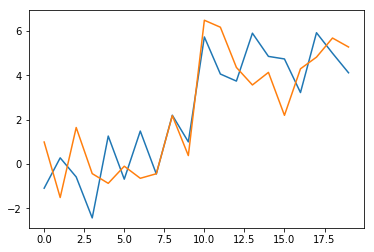

In [5]:
plt.plot(x)

In [6]:
x

array([[-1.0856306 ,  0.99734545],
       [ 0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654],
       [-2.42667924, -0.42891263],
       [ 1.26593626, -0.8667404 ],
       [-0.67888615, -0.09470897],
       [ 1.49138963, -0.638902  ],
       [-0.44398196, -0.43435128],
       [ 2.20593008,  2.18678609],
       [ 1.0040539 ,  0.3861864 ],
       [ 5.73736858,  6.49073203],
       [ 4.06416613,  6.17582904],
       [ 3.74611933,  4.3622485 ],
       [ 5.9071052 ,  3.5713193 ],
       [ 4.85993128,  4.1382451 ],
       [ 4.74438063,  2.20141089],
       [ 3.2284669 ,  4.30012277],
       [ 5.92746243,  4.82636432],
       [ 5.00284592,  5.68822271],
       [ 4.12046366,  5.28362732]])

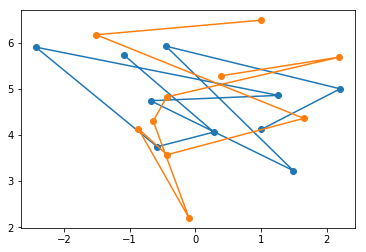

In [7]:
plt.plot(x1, x2, marker='o')

In [8]:
np.zeros(d)
b = 0

In [9]:
def y(x):
    return step(np.dot(w, x) + b)


def step(x):
    return 1 * (x > 0)

In [10]:
def t(i):
    if i < N:
        return 0
    else:
        return 1

In [11]:
w = 0
while True:
    classified = True
    for i in range(N * 2):
        delta_w = (t(i) - y(x[i])) * x[i]
        delta_b = (t(i) - y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w == 0) * (delta_b == 0)
    if classified.all():
        break

In [12]:
w

array([2.14037745, 1.2763927 ])

In [13]:
b

array([-9, -9])

In [14]:
classified

array([ True,  True])

In [15]:
y([0, 0])

array([0, 0])

In [16]:
y([5, 5])

array([1, 1])

In [17]:
w = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

In [18]:
print(w)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32_ref>


In [19]:
def y(x):
    return sigmoid(np.dot(w, x) + b)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [20]:
x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.nn.sigmoid(tf.matmul(x, w) + b)

In [21]:
cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))

In [22]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [23]:
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [24]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

In [25]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [26]:
for epoch in range(200):
    sess.run(train_step, feed_dict={x: X, t: Y})

In [27]:
classified = correct_prediction.eval(session=sess, feed_dict={x: X, t: Y})

In [28]:
print(classified)

[[ True]
 [ True]
 [ True]
 [ True]]


In [29]:
prob = y.eval(session=sess, feed_dict={x: X, y: Y})
print(prob)

[[0.]
 [1.]
 [1.]
 [1.]]


In [30]:
print('w', sess.run(w))
print('b', sess.run(b))

w [[3.6118839]
 [3.6118839]]
b [-1.2450948]


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential([Dense(input_dim=2, units=1), Activation('sigmoid')])

Using TensorFlow backend.


In [32]:
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

In [34]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

In [35]:
model.fit(X, Y, epochs=200, batch_size=1)

Epoch 1/200
4/4 [==============================] - 0s 40ms/step - loss: 0.4607
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4414
Epoch 3/200
4/4 [==============================] - 0s 999us/step - loss: 0.4258
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4128
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4018
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3923
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3840
Epoch 8/200
4/4 [==============================] - 0s 1000us/step - loss: 0.3767
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3698
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3635
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3577
Epoch 12/200
4/4 [==============================] - 0s 750us/step - loss: 0.3524
Epoch 13/200
4/4 [==============================] - 0

4/4 [==============================] - 0s 1ms/step - loss: 0.1652
Epoch 104/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1642
Epoch 105/200
4/4 [==============================] - 0s 999us/step - loss: 0.1632
Epoch 106/200
4/4 [==============================] - 0s 750us/step - loss: 0.1622
Epoch 107/200
4/4 [==============================] - 0s 750us/step - loss: 0.1613
Epoch 108/200
4/4 [==============================] - 0s 1000us/step - loss: 0.1603
Epoch 109/200
4/4 [==============================] - 0s 749us/step - loss: 0.1594
Epoch 110/200
4/4 [==============================] - 0s 750us/step - loss: 0.1585
Epoch 111/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1576
Epoch 112/200
4/4 [==============================] - 0s 999us/step - loss: 0.1567
Epoch 113/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1558
Epoch 114/200
4/4 [==============================] - 0s 1000us/step - loss: 0.1549
Epoch 115/200
4/4 [=================

In [36]:
classes = model.predict_classes(X, batch_size=1)
prob = model.predict_proba(X, batch_size=1)

In [37]:
print(classes)
print()
print(prob)

[[0]
 [1]
 [1]
 [1]]

[[0.21043071]
 [0.916164  ]
 [0.9216606 ]
 [0.99793136]]


In [38]:
from sklearn.utils import shuffle

In [40]:
M = 2
K = 3
n = 100
N = n * K

In [42]:
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])

Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)

In [45]:
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [46]:
cross_entropy = tf.reduce_mean(
    -tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))

In [47]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [49]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [50]:
batch_size = 50
n_batches = N

In [56]:
# for epoch in range(20):
#     X_, Y_ = shuffle(X, Y)
    
#     for i in range(n_batches):
#         start = i * batch_size
#         end = start + batch_size
        
#         sess.run(train_step, feed_dict={
#             x:X_[start:end],
#             y:Y_[start:end]
#         })

In [57]:
model = Sequential()
model.add(Dense(input_dim=M, units=K))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))

In [59]:
minibatch_size = 50
model.fit(X, Y, epochs=20, batch_size=minibatch_size)

Epoch 1/20
300/300 [==============================] - 0s 500us/step - loss: 2.2868
Epoch 2/20
300/300 [==============================] - 0s 17us/step - loss: 0.2167
Epoch 3/20
300/300 [==============================] - 0s 43us/step - loss: 0.1380
Epoch 4/20
300/300 [==============================] - 0s 20us/step - loss: 0.1097
Epoch 5/20
300/300 [==============================] - 0s 37us/step - loss: 0.0920
Epoch 6/20
300/300 [==============================] - 0s 33us/step - loss: 0.0806
Epoch 7/20
300/300 [==============================] - 0s 27us/step - loss: 0.0717
Epoch 8/20
300/300 [==============================] - 0s 27us/step - loss: 0.0648
Epoch 9/20
300/300 [==============================] - 0s 17us/step - loss: 0.0587
Epoch 10/20
300/300 [==============================] - 0s 27us/step - loss: 0.0551
Epoch 11/20
300/300 [==============================] - 0s 43us/step - loss: 0.0511
Epoch 12/20
300/300 [==============================] - 0s 20us/step - loss: 0.0482
Epoch 13/20


In [62]:
X_, Y_ = shuffle(X, Y)
classes = model.predict_classes(X_[0:10], batch_size=minibatch_size)
prob = model.predict_proba(X_[0:10], batch_size=minibatch_size)
print('classified:')
print(np.argmax(model.predict(X_[0:10]), axis=1) == classes)
print()
print('ouput pprobability:')
print(prob)

classified:
[ True  True  True  True  True  True  True  True  True  True]

ouput pprobability:
[[5.5228472e-02 9.3407065e-01 1.0700959e-02]
 [4.3454637e-08 8.4750140e-03 9.9152488e-01]
 [9.6551883e-01 3.4481209e-02 2.5033522e-08]
 [1.8997063e-08 1.3658960e-02 9.8634094e-01]
 [1.7911272e-08 2.8929522e-02 9.7107047e-01]
 [5.4019850e-08 1.1125061e-02 9.8887491e-01]
 [9.9096441e-01 9.0356115e-03 1.0692543e-08]
 [9.8722470e-01 1.2775295e-02 1.5259722e-08]
 [8.3675772e-01 1.6323945e-01 2.8910993e-06]
 [2.6098703e-09 3.6798215e-03 9.9632013e-01]]


In [64]:
np.random.seed(0)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

model = Sequential([
    Dense(input_dim=2, output_dim=1),
    Activation('sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
model.fit(X, Y, epochs=200, batch_size=1)

prob = model.predict_proba(X, batch_size=1)
print(prob)

C:\Users\ML\Anaconda3\envs\me\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2, units=1)`
  import sys


Epoch 1/200
4/4 [==============================] - 0s 41ms/step - loss: 0.8427
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 0.8205
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 0.8049
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7924
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7822
Epoch 6/200
4/4 [==============================] - 0s 1000us/step - loss: 0.7754
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7688
Epoch 8/200
4/4 [==============================] - 0s 998us/step - loss: 0.7622
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7578
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7555
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7520
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7497
Epoch 13/200
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 1ms/step - loss: 0.7190
Epoch 104/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7200
Epoch 105/200
4/4 [==============================] - 0s 999us/step - loss: 0.7199
Epoch 106/200
4/4 [==============================] - 0s 1000us/step - loss: 0.7193
Epoch 107/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7199
Epoch 108/200
4/4 [==============================] - 0s 1000us/step - loss: 0.7192
Epoch 109/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7197
Epoch 110/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7194
Epoch 111/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7191
Epoch 112/200
4/4 [==============================] - 0s 1000us/step - loss: 0.7198
Epoch 113/200
4/4 [==============================] - 0s 999us/step - loss: 0.7196
Epoch 114/200
4/4 [==============================] - 0s 999us/step - loss: 0.7190
Epoch 115/200
4/4 [====================

In [65]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array(([0], [1], [1], [0]))

In [66]:
x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

In [68]:
W = tf.Variable(tf.truncated_normal([2,2]))
b = tf.Variable(tf.zeros([2]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

In [69]:
V = tf.Variable(tf.truncated_normal([2, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

In [70]:
cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1-y))

In [71]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [72]:
init =tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [76]:
for epoch in range(4000):
    sess.run(train_step, feed_dict={
        x: X,
        t: Y
    })
    if epoch % 1000 == 0:
        print('epoch:', epoch)

epoch: 0
epoch: 1000
epoch: 2000
epoch: 3000
epoch: 4000
epoch: 5000
epoch: 6000
epoch: 7000
epoch: 8000
epoch: 9000
epoch: 10000
epoch: 11000
epoch: 12000
epoch: 13000
epoch: 14000
epoch: 15000
epoch: 16000
epoch: 17000
epoch: 18000
epoch: 19000
epoch: 20000
epoch: 21000
epoch: 22000
epoch: 23000
epoch: 24000
epoch: 25000
epoch: 26000
epoch: 27000
epoch: 28000
epoch: 29000
epoch: 30000
epoch: 31000
epoch: 32000
epoch: 33000
epoch: 34000
epoch: 35000
epoch: 36000
epoch: 37000
epoch: 38000
epoch: 39000


In [77]:
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X,
    t: Y
})
prob = y.eval(session=sess, feed_dict={
    x: X
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[[ True]
 [ True]
 [False]
 [False]]

output probability:
[[2.6226009e-04]
 [9.9963176e-01]
 [4.9989656e-01]
 [5.0018650e-01]]


In [79]:
model = Sequential()

model.add(Dense(input_dim=2, units=2))
model.add(Activation('sigmoid'))

model.add(Dense(units=1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

In [81]:
model.fit(X, Y, epochs=4000, batch_size=4)

Epoch 1/4000
4/4 [==============================] - 0s 56ms/step - loss: 0.7113
Epoch 2/4000
4/4 [==============================] - 0s 499us/step - loss: 0.7100
Epoch 3/4000
4/4 [==============================] - 0s 999us/step - loss: 0.7089
Epoch 4/4000
4/4 [==============================] - 0s 749us/step - loss: 0.7078
Epoch 5/4000
4/4 [==============================] - 0s 500us/step - loss: 0.7068
Epoch 6/4000
4/4 [==============================] - 0s 499us/step - loss: 0.7058
Epoch 7/4000
4/4 [==============================] - 0s 500us/step - loss: 0.7050
Epoch 8/4000
4/4 [==============================] - 0s 250us/step - loss: 0.7042
Epoch 9/4000
4/4 [==============================] - 0s 250us/step - loss: 0.7034
Epoch 10/4000
4/4 [==============================] - 0s 249us/step - loss: 0.7027
Epoch 11/4000
4/4 [==============================] - 0s 250us/step - loss: 0.7021
Epoch 12/4000
4/4 [==============================] - 0s 250us/step - loss: 0.7015
Epoch 13/4000
4/4 [=======

Epoch 102/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 103/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 104/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 105/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 106/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 107/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 108/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 109/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 110/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 111/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 112/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 113/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoc

Epoch 201/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6931
Epoch 202/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 203/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 204/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6931
Epoch 205/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 206/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 207/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 208/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6931
Epoch 209/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6931
Epoch 210/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6931
Epoch 211/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 212/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 

Epoch 300/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6930
Epoch 301/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 302/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 303/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6930
Epoch 304/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 305/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 306/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 307/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 308/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 309/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 310/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 311/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6930
Epoch 

Epoch 399/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6928
Epoch 400/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 401/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 402/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 403/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 404/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 405/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 406/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6928
Epoch 407/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 408/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 409/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 410/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 

Epoch 498/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 499/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 500/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 501/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 502/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 503/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 504/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 505/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 506/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 507/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6926
Epoch 508/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 509/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoc

Epoch 597/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 598/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 599/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 600/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 601/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 602/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 603/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 604/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 605/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 606/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 607/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 608/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoc

Epoch 696/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6921
Epoch 697/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6921
Epoch 698/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6921
Epoch 699/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6921
Epoch 700/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6921
Epoch 701/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6921
Epoch 702/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6921
Epoch 703/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6921
Epoch 704/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6921
Epoch 705/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6921
Epoch 706/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6921
Epoch 707/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6921
Epoch 

Epoch 795/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6918
Epoch 796/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6918
Epoch 797/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6918
Epoch 798/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6918
Epoch 799/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6918
Epoch 800/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6918
Epoch 801/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6918
Epoch 802/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6918
Epoch 803/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6918
Epoch 804/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6918
Epoch 805/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6918
Epoch 806/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6918
Epoch 

Epoch 895/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6914
Epoch 896/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6914
Epoch 897/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6914
Epoch 898/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6914
Epoch 899/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6914
Epoch 900/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6914
Epoch 901/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6914
Epoch 902/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6914
Epoch 903/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6914
Epoch 904/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6914
Epoch 905/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6914
Epoch 906/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6914
Epoch 

Epoch 994/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6910
Epoch 995/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6910
Epoch 996/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 997/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 998/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 999/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 1000/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 1001/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 1002/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 1003/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 1004/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 1005/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909


Epoch 1092/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6904
Epoch 1093/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6904
Epoch 1094/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6903
Epoch 1095/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6903
Epoch 1096/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6903
Epoch 1097/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6903
Epoch 1098/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6903
Epoch 1099/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6903
Epoch 1100/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6903
Epoch 1101/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6903
Epoch 1102/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6903
Epoch 1103/4000
4/4 [==============================] - 0s 250us/step - loss: 

Epoch 1190/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6896
Epoch 1191/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6896
Epoch 1192/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6896
Epoch 1193/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6896
Epoch 1194/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6896
Epoch 1195/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6895
Epoch 1196/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6895
Epoch 1197/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6895
Epoch 1198/4000
4/4 [==============================] - 0s 999us/step - loss: 0.6895
Epoch 1199/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6895
Epoch 1200/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6895
Epoch 1201/4000
4/4 [==============================] - 0s 250us/step - loss: 0

Epoch 1288/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6886
Epoch 1289/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6886
Epoch 1290/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6886
Epoch 1291/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6886
Epoch 1292/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6886
Epoch 1293/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6885
Epoch 1294/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6885
Epoch 1295/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6885
Epoch 1296/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6885
Epoch 1297/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6885
Epoch 1298/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6885
Epoch 1299/4000
4/4 [==============================] - 0s 500us/step - loss:

Epoch 1386/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6873
Epoch 1387/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6873
Epoch 1388/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6873
Epoch 1389/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6873
Epoch 1390/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6872
Epoch 1391/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6872
Epoch 1392/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6872
Epoch 1393/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6872
Epoch 1394/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6872
Epoch 1395/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6872
Epoch 1396/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6871
Epoch 1397/4000
4/4 [==============================] - 0s 250us/step - loss: 0

Epoch 1484/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6856
Epoch 1485/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6856
Epoch 1486/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6855
Epoch 1487/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6855
Epoch 1488/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6855
Epoch 1489/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6855
Epoch 1490/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6855
Epoch 1491/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6854
Epoch 1492/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6854
Epoch 1493/4000
4/4 [==============================] - 0s 999us/step - loss: 0.6854
Epoch 1494/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6854
Epoch 1495/4000
4/4 [==============================] - 0s 500us/step - loss

Epoch 1582/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6833
Epoch 1583/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6833
Epoch 1584/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6833
Epoch 1585/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6833
Epoch 1586/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6832
Epoch 1587/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6832
Epoch 1588/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6832
Epoch 1589/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6832
Epoch 1590/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6831
Epoch 1591/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6831
Epoch 1592/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6831
Epoch 1593/4000
4/4 [==============================] - 0s 250us/step - loss: 0

Epoch 1680/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6804
Epoch 1681/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6804
Epoch 1682/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6803
Epoch 1683/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6803
Epoch 1684/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6803
Epoch 1685/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6802
Epoch 1686/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6802
Epoch 1687/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6802
Epoch 1688/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6801
Epoch 1689/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6801
Epoch 1690/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6801
Epoch 1691/4000
4/4 [==============================] - 0s 250us/step - loss: 0

Epoch 1778/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6766
Epoch 1779/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6766
Epoch 1780/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6765
Epoch 1781/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6765
Epoch 1782/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6765
Epoch 1783/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6764
Epoch 1784/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6764
Epoch 1785/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6763
Epoch 1786/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6763
Epoch 1787/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6762
Epoch 1788/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6762
Epoch 1789/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 1876/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6718
Epoch 1877/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6718
Epoch 1878/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6717
Epoch 1879/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6717
Epoch 1880/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6716
Epoch 1881/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6716
Epoch 1882/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6715
Epoch 1883/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6714
Epoch 1884/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6714
Epoch 1885/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6713
Epoch 1886/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6713
Epoch 1887/4000
4/4 [==============================] - 0s 250us/step - loss: 0

Epoch 1974/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6658
Epoch 1975/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6657
Epoch 1976/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6657
Epoch 1977/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6656
Epoch 1978/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6655
Epoch 1979/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6655
Epoch 1980/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6654
Epoch 1981/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6653
Epoch 1982/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6653
Epoch 1983/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6652
Epoch 1984/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6651
Epoch 1985/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 2072/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6584
Epoch 2073/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6583
Epoch 2074/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6582
Epoch 2075/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6581
Epoch 2076/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6581
Epoch 2077/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6580
Epoch 2078/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6579
Epoch 2079/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6578
Epoch 2080/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6577
Epoch 2081/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6576
Epoch 2082/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6576
Epoch 2083/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 2170/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6494
Epoch 2171/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6493
Epoch 2172/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6492
Epoch 2173/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6491
Epoch 2174/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6490
Epoch 2175/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6489
Epoch 2176/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6488
Epoch 2177/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6487
Epoch 2178/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6486
Epoch 2179/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6485
Epoch 2180/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6484
Epoch 2181/4000
4/4 [==============================] - 0s 250us/step - loss: 0

Epoch 2268/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6388
Epoch 2269/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6387
Epoch 2270/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6386
Epoch 2271/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6385
Epoch 2272/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6383
Epoch 2273/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6382
Epoch 2274/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6381
Epoch 2275/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6380
Epoch 2276/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6379
Epoch 2277/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6377
Epoch 2278/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6376
Epoch 2279/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 2366/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6265
Epoch 2367/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6264
Epoch 2368/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6262
Epoch 2369/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6261
Epoch 2370/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6260
Epoch 2371/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6258
Epoch 2372/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6257
Epoch 2373/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6256
Epoch 2374/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6254
Epoch 2375/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6253
Epoch 2376/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6252
Epoch 2377/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 2464/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6126
Epoch 2465/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6125
Epoch 2466/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6123
Epoch 2467/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6122
Epoch 2468/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6120
Epoch 2469/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6119
Epoch 2470/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6117
Epoch 2471/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6116
Epoch 2472/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6114
Epoch 2473/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6113
Epoch 2474/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6111
Epoch 2475/4000
4/4 [==============================] - 0s 750us/step - loss: 0

Epoch 2562/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5975
Epoch 2563/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5973
Epoch 2564/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5972
Epoch 2565/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5970
Epoch 2566/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5969
Epoch 2567/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5967
Epoch 2568/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5965
Epoch 2569/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5964
Epoch 2570/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5962
Epoch 2571/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5961
Epoch 2572/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5959
Epoch 2573/4000
4/4 [==============================] - 0s 749us/step - loss: 0

Epoch 2660/4000
4/4 [==============================] - 0s 249us/step - loss: 0.5815
Epoch 2661/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5813
Epoch 2662/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5812
Epoch 2663/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5810
Epoch 2664/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5808
Epoch 2665/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5807
Epoch 2666/4000
4/4 [==============================] - 0s 750us/step - loss: 0.5805
Epoch 2667/4000
4/4 [==============================] - 0s 749us/step - loss: 0.5803
Epoch 2668/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5802
Epoch 2669/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5800
Epoch 2670/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5798
Epoch 2671/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 2758/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5651
Epoch 2759/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5649
Epoch 2760/4000
4/4 [==============================] - 0s 0us/step - loss: 0.5648
Epoch 2761/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5646
Epoch 2762/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5644
Epoch 2763/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5643
Epoch 2764/4000
4/4 [==============================] - 0s 0us/step - loss: 0.5641
Epoch 2765/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5639
Epoch 2766/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5637
Epoch 2767/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5636
Epoch 2768/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5634
Epoch 2769/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5

Epoch 2856/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5488
Epoch 2857/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5486
Epoch 2858/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5484
Epoch 2859/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5483
Epoch 2860/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5481
Epoch 2861/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5479
Epoch 2862/4000
4/4 [==============================] - 0s 0us/step - loss: 0.5478
Epoch 2863/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5476
Epoch 2864/4000
4/4 [==============================] - 0s 749us/step - loss: 0.5474
Epoch 2865/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5473
Epoch 2866/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5471
Epoch 2867/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5

Epoch 2954/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5329
Epoch 2955/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5327
Epoch 2956/4000
4/4 [==============================] - 0s 749us/step - loss: 0.5325
Epoch 2957/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.5324
Epoch 2958/4000
4/4 [==============================] - 0s 499us/step - loss: 0.5322
Epoch 2959/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5321
Epoch 2960/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5319
Epoch 2961/4000
4/4 [==============================] - 0s 499us/step - loss: 0.5317
Epoch 2962/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5316
Epoch 2963/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5314
Epoch 2964/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5313
Epoch 2965/4000
4/4 [==============================] - 0s 250us/step - loss: 0

Epoch 3052/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5177
Epoch 3053/4000
4/4 [==============================] - 0s 499us/step - loss: 0.5175
Epoch 3054/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5174
Epoch 3055/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5172
Epoch 3056/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5171
Epoch 3057/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5169
Epoch 3058/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5168
Epoch 3059/4000
4/4 [==============================] - 0s 0us/step - loss: 0.5166
Epoch 3060/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5165
Epoch 3061/4000
4/4 [==============================] - 0s 0us/step - loss: 0.5163
Epoch 3062/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5162
Epoch 3063/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5

Epoch 3150/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5034
Epoch 3151/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5032
Epoch 3152/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5031
Epoch 3153/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5029
Epoch 3154/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5028
Epoch 3155/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5027
Epoch 3156/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5025
Epoch 3157/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5024
Epoch 3158/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5022
Epoch 3159/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5021
Epoch 3160/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5020
Epoch 3161/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 3248/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4901
Epoch 3249/4000
4/4 [==============================] - 0s 749us/step - loss: 0.4900
Epoch 3250/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4898
Epoch 3251/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4897
Epoch 3252/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4896
Epoch 3253/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4894
Epoch 3254/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4893
Epoch 3255/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4892
Epoch 3256/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.4891
Epoch 3257/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4889
Epoch 3258/4000
4/4 [==============================] - 0s 249us/step - loss: 0.4888
Epoch 3259/4000
4/4 [==============================] - 0s 499us/step - loss

Epoch 3346/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4779
Epoch 3347/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4778
Epoch 3348/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4777
Epoch 3349/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4775
Epoch 3350/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4774
Epoch 3351/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4773
Epoch 3352/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4772
Epoch 3353/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4771
Epoch 3354/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4769
Epoch 3355/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4768
Epoch 3356/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4767
Epoch 3357/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 3444/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4668
Epoch 3445/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4667
Epoch 3446/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4666
Epoch 3447/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4665
Epoch 3448/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4663
Epoch 3449/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4662
Epoch 3450/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4661
Epoch 3451/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4660
Epoch 3452/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4659
Epoch 3453/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4658
Epoch 3454/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4657
Epoch 3455/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 3542/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4567
Epoch 3543/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4566
Epoch 3544/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4565
Epoch 3545/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4564
Epoch 3546/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4563
Epoch 3547/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4562
Epoch 3548/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4561
Epoch 3549/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4560
Epoch 3550/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4559
Epoch 3551/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4559
Epoch 3552/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4558
Epoch 3553/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 3640/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4477
Epoch 3641/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4476
Epoch 3642/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4475
Epoch 3643/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4474
Epoch 3644/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4473
Epoch 3645/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4472
Epoch 3646/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4472
Epoch 3647/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4471
Epoch 3648/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4470
Epoch 3649/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4469
Epoch 3650/4000
4/4 [==============================] - 0s 0us/step - loss: 0.4468
Epoch 3651/4000
4/4 [==============================] - 0s 250us/step - loss: 0

Epoch 3738/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4396
Epoch 3739/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4395
Epoch 3740/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4394
Epoch 3741/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4393
Epoch 3742/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4393
Epoch 3743/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4392
Epoch 3744/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4391
Epoch 3745/4000
4/4 [==============================] - 0s 0us/step - loss: 0.4390
Epoch 3746/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4390
Epoch 3747/4000
4/4 [==============================] - 0s 0us/step - loss: 0.4389
Epoch 3748/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4388
Epoch 3749/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4

Epoch 3836/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4323
Epoch 3837/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4323
Epoch 3838/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4322
Epoch 3839/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4321
Epoch 3840/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4320
Epoch 3841/4000
4/4 [==============================] - 0s 499us/step - loss: 0.4320
Epoch 3842/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4319
Epoch 3843/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4318
Epoch 3844/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4318
Epoch 3845/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4317
Epoch 3846/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4316
Epoch 3847/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 3934/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4258
Epoch 3935/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4258
Epoch 3936/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4257
Epoch 3937/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4257
Epoch 3938/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4256
Epoch 3939/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4255
Epoch 3940/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4255
Epoch 3941/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.4254
Epoch 3942/4000
4/4 [==============================] - 0s 750us/step - loss: 0.4254
Epoch 3943/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4253
Epoch 3944/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4252
Epoch 3945/4000
4/4 [==============================] - 0s 250us/step - loss: 0

In [82]:
classes = model.predict_classes(X, batch_size=4)
prob = model.predict_proba(X, batch_size=4)

print('classified:')
print(Y == classes)
print()
print('output probability:')
print(prob)

classified:
[[ True]
 [ True]
 [False]
 [False]]

output probability:
[[0.07516328]
 [0.8822128 ]
 [0.49923015]
 [0.5457662 ]]


In [83]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [84]:
Y

array([[0],
       [1],
       [1],
       [0]])

In [86]:
from sklearn import datasets

N = 300
X, y = datasets.make_moons(N, noise=0.3)

In [88]:
from sklearn.model_selection import train_test_split

Y = y.reshape(N, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

C:\Users\ML\Anaconda3\envs\me\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [89]:
num_hidden = 2

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.truncated_normal([2, num_hidden]))
b = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

V = tf.Variable(tf.truncated_normal([num_hidden, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1-y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [91]:
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# batch_size = 20
# n_batches = N // batch_size

# init = tf.global_variables_initializer()
# sess = tf.Session()
# sess.run(init)

# for epoch in range(500):
#     X_, Y_ = shuffle(X_train, Y_train)
    
#     for i in range(n_batches):
#         start = i * batch_size
#         end = start + batch_size
        
#         sess.run(train_step, feed_dict={
#             x: X_[start:end],
#             y: Y_[start:end]
#         })

In [96]:
N = 300
X, y = datasets.make_moons(N, noise=0.3)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

model = Sequential()
model.add(Dense(3, input_dim=2))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=SGD(lr=0.05),
             metrics=['accuracy'])

In [98]:
model.fit(X_train, y_train, epochs=500, batch_size=20)

Epoch 1/500
240/240 [==============================] - 0s 1ms/step - loss: 0.6601 - acc: 0.5583
Epoch 2/500
240/240 [==============================] - 0s 58us/step - loss: 0.6559 - acc: 0.5833
Epoch 3/500
240/240 [==============================] - 0s 42us/step - loss: 0.6516 - acc: 0.6042
Epoch 4/500
240/240 [==============================] - 0s 46us/step - loss: 0.6472 - acc: 0.6083
Epoch 5/500
240/240 [==============================] - 0s 54us/step - loss: 0.6429 - acc: 0.6125
Epoch 6/500
240/240 [==============================] - 0s 62us/step - loss: 0.6390 - acc: 0.6292
Epoch 7/500
240/240 [==============================] - 0s 75us/step - loss: 0.6350 - acc: 0.6250
Epoch 8/500
240/240 [==============================] - 0s 67us/step - loss: 0.6307 - acc: 0.6500
Epoch 9/500
240/240 [==============================] - 0s 58us/step - loss: 0.6265 - acc: 0.6375
Epoch 10/500
240/240 [==============================] - 0s 50us/step - loss: 0.6225 - acc: 0.6458
Epoch 11/500
240/240 [========

240/240 [==============================] - 0s 37us/step - loss: 0.3628 - acc: 0.8333
Epoch 85/500
240/240 [==============================] - 0s 42us/step - loss: 0.3611 - acc: 0.8333
Epoch 86/500
240/240 [==============================] - 0s 46us/step - loss: 0.3593 - acc: 0.8375
Epoch 87/500
240/240 [==============================] - 0s 42us/step - loss: 0.3574 - acc: 0.8375
Epoch 88/500
240/240 [==============================] - 0s 46us/step - loss: 0.3555 - acc: 0.8458
Epoch 89/500
240/240 [==============================] - 0s 50us/step - loss: 0.3538 - acc: 0.8458
Epoch 90/500
240/240 [==============================] - 0s 58us/step - loss: 0.3522 - acc: 0.8458
Epoch 91/500
240/240 [==============================] - 0s 50us/step - loss: 0.3504 - acc: 0.8500
Epoch 92/500
240/240 [==============================] - 0s 42us/step - loss: 0.3487 - acc: 0.8500
Epoch 93/500
240/240 [==============================] - 0s 42us/step - loss: 0.3471 - acc: 0.8583
Epoch 94/500
240/240 [===========

240/240 [==============================] - 0s 42us/step - loss: 0.2854 - acc: 0.8792
Epoch 168/500
240/240 [==============================] - 0s 37us/step - loss: 0.2849 - acc: 0.8750
Epoch 169/500
240/240 [==============================] - 0s 42us/step - loss: 0.2844 - acc: 0.8792
Epoch 170/500
240/240 [==============================] - 0s 54us/step - loss: 0.2839 - acc: 0.8792
Epoch 171/500
240/240 [==============================] - 0s 37us/step - loss: 0.2837 - acc: 0.8750
Epoch 172/500
240/240 [==============================] - 0s 37us/step - loss: 0.2834 - acc: 0.8792
Epoch 173/500
240/240 [==============================] - 0s 42us/step - loss: 0.2832 - acc: 0.8708
Epoch 174/500
240/240 [==============================] - 0s 50us/step - loss: 0.2826 - acc: 0.8750
Epoch 175/500
240/240 [==============================] - 0s 46us/step - loss: 0.2824 - acc: 0.8750
Epoch 176/500
240/240 [==============================] - 0s 42us/step - loss: 0.2821 - acc: 0.8750
Epoch 177/500
240/240 [=

240/240 [==============================] - 0s 46us/step - loss: 0.2704 - acc: 0.8708
Epoch 250/500
240/240 [==============================] - 0s 46us/step - loss: 0.2707 - acc: 0.8708
Epoch 251/500
240/240 [==============================] - 0s 42us/step - loss: 0.2704 - acc: 0.8708
Epoch 252/500
240/240 [==============================] - 0s 37us/step - loss: 0.2704 - acc: 0.8708
Epoch 253/500
240/240 [==============================] - 0s 46us/step - loss: 0.2704 - acc: 0.8708
Epoch 254/500
240/240 [==============================] - 0s 46us/step - loss: 0.2702 - acc: 0.8708
Epoch 255/500
240/240 [==============================] - 0s 42us/step - loss: 0.2701 - acc: 0.8708
Epoch 256/500
240/240 [==============================] - 0s 42us/step - loss: 0.2701 - acc: 0.8708
Epoch 257/500
240/240 [==============================] - 0s 50us/step - loss: 0.2701 - acc: 0.8708
Epoch 258/500
240/240 [==============================] - 0s 42us/step - loss: 0.2701 - acc: 0.8708
Epoch 259/500
240/240 [=

240/240 [==============================] - 0s 42us/step - loss: 0.2674 - acc: 0.8625
Epoch 332/500
240/240 [==============================] - 0s 42us/step - loss: 0.2672 - acc: 0.8625
Epoch 333/500
240/240 [==============================] - 0s 37us/step - loss: 0.2673 - acc: 0.8625
Epoch 334/500
240/240 [==============================] - 0s 37us/step - loss: 0.2673 - acc: 0.8625
Epoch 335/500
240/240 [==============================] - 0s 46us/step - loss: 0.2671 - acc: 0.8625
Epoch 336/500
240/240 [==============================] - 0s 42us/step - loss: 0.2672 - acc: 0.8625
Epoch 337/500
240/240 [==============================] - 0s 46us/step - loss: 0.2670 - acc: 0.8625
Epoch 338/500
240/240 [==============================] - 0s 46us/step - loss: 0.2673 - acc: 0.8625
Epoch 339/500
240/240 [==============================] - 0s 46us/step - loss: 0.2671 - acc: 0.8625
Epoch 340/500
240/240 [==============================] - 0s 42us/step - loss: 0.2672 - acc: 0.8625
Epoch 341/500
240/240 [=

240/240 [==============================] - 0s 37us/step - loss: 0.2663 - acc: 0.8667
Epoch 414/500
240/240 [==============================] - 0s 42us/step - loss: 0.2664 - acc: 0.8667
Epoch 415/500
240/240 [==============================] - 0s 42us/step - loss: 0.2662 - acc: 0.8625
Epoch 416/500
240/240 [==============================] - 0s 37us/step - loss: 0.2661 - acc: 0.8667
Epoch 417/500
240/240 [==============================] - 0s 46us/step - loss: 0.2663 - acc: 0.8667
Epoch 418/500
240/240 [==============================] - 0s 46us/step - loss: 0.2661 - acc: 0.8667
Epoch 419/500
240/240 [==============================] - 0s 37us/step - loss: 0.2662 - acc: 0.8708
Epoch 420/500
240/240 [==============================] - 0s 46us/step - loss: 0.2665 - acc: 0.8625
Epoch 421/500
240/240 [==============================] - 0s 42us/step - loss: 0.2661 - acc: 0.8667
Epoch 422/500
240/240 [==============================] - 0s 42us/step - loss: 0.2660 - acc: 0.8667
Epoch 423/500
240/240 [=

240/240 [==============================] - 0s 62us/step - loss: 0.2660 - acc: 0.8667
Epoch 496/500
240/240 [==============================] - 0s 46us/step - loss: 0.2656 - acc: 0.8667
Epoch 497/500
240/240 [==============================] - 0s 75us/step - loss: 0.2661 - acc: 0.8667
Epoch 498/500
240/240 [==============================] - 0s 46us/step - loss: 0.2659 - acc: 0.8667
Epoch 499/500
240/240 [==============================] - 0s 42us/step - loss: 0.2657 - acc: 0.8667
Epoch 500/500
240/240 [==============================] - 0s 46us/step - loss: 0.2662 - acc: 0.8667


In [99]:
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)

60/60 [==============================] - 0s 1ms/step
[0.4497840980688731, 0.8166666706403096]
